# Advanced Feature Engineering


Feature Engineering¶
What is a feature and why we need the engineering of it?

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. Feature engineering efforts mainly have two goals:

Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

Improving the performance of machine learning models.

The important point is that machine learning algorithms desire structured dataset because of that reason feature engineering is a key indicator for data science life cyle. Harward Business Review article stated that, "Poor data quality is enemy number one to the widespread, profitable use of machine learning. The quality demands of machine learning are steep, and bad data can rear its ugly head twice both in the historical data used to train the predictive model and in the new data used by that model to make future decisions. To ensure you have the right data for machine learning, you must have an aggressive, well-executed quality program."

Besides that, according to a survey in Forbes, data scientists spend 80% of their time on data preparation:

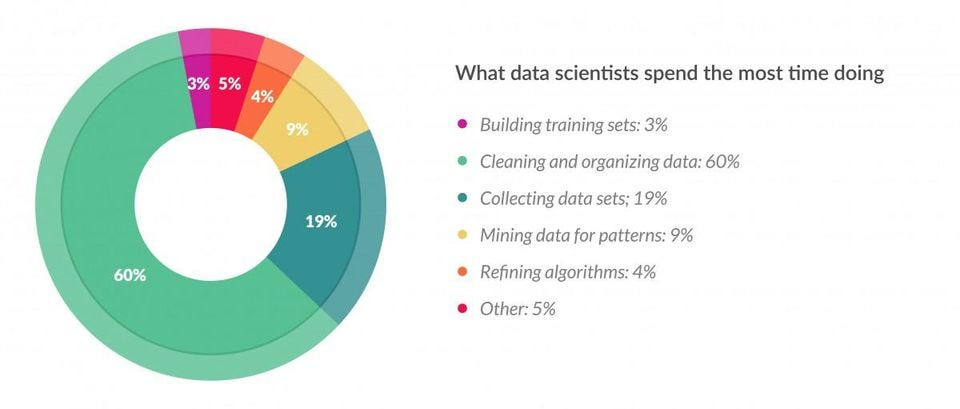

https://hbr.org/2018/04/if-your-data-is-bad-your-machine-learning-tools-are-useless

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=28c8fe0c6f63

In this notebook we will deeply analyze feature engineering topics as below.

- Outliers
- Missing Values
- Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
- Feature Scaling
- Feature Extraction
- Feature Interactions
- End-to-End Application

## 1. Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

👉 Trimming: It excludes the outlier values from our analysis. By applying this technique our data becomes thin when there are more outliers present in the dataset. Its main advantage is its fastest nature.

👉 Capping: In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

For Example, if you’re working on the income feature, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

👉 Treat outliers as a missing value: By assuming outliers as the missing observations, treat them accordingly i.e, same as those of missing values.

👉 Discretization: In this technique, by making the groups we include the outliers in a particular group and force them to behave in the same manner as those of other points in that group. This technique is also known as Binning.

How to Detect Outliers ?

👉 For Normal distributions: Use empirical relations of Normal distribution.

   The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

where mean and sigma are the average value and standard deviation of a particular column.

👉 For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule (Box Plot).

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

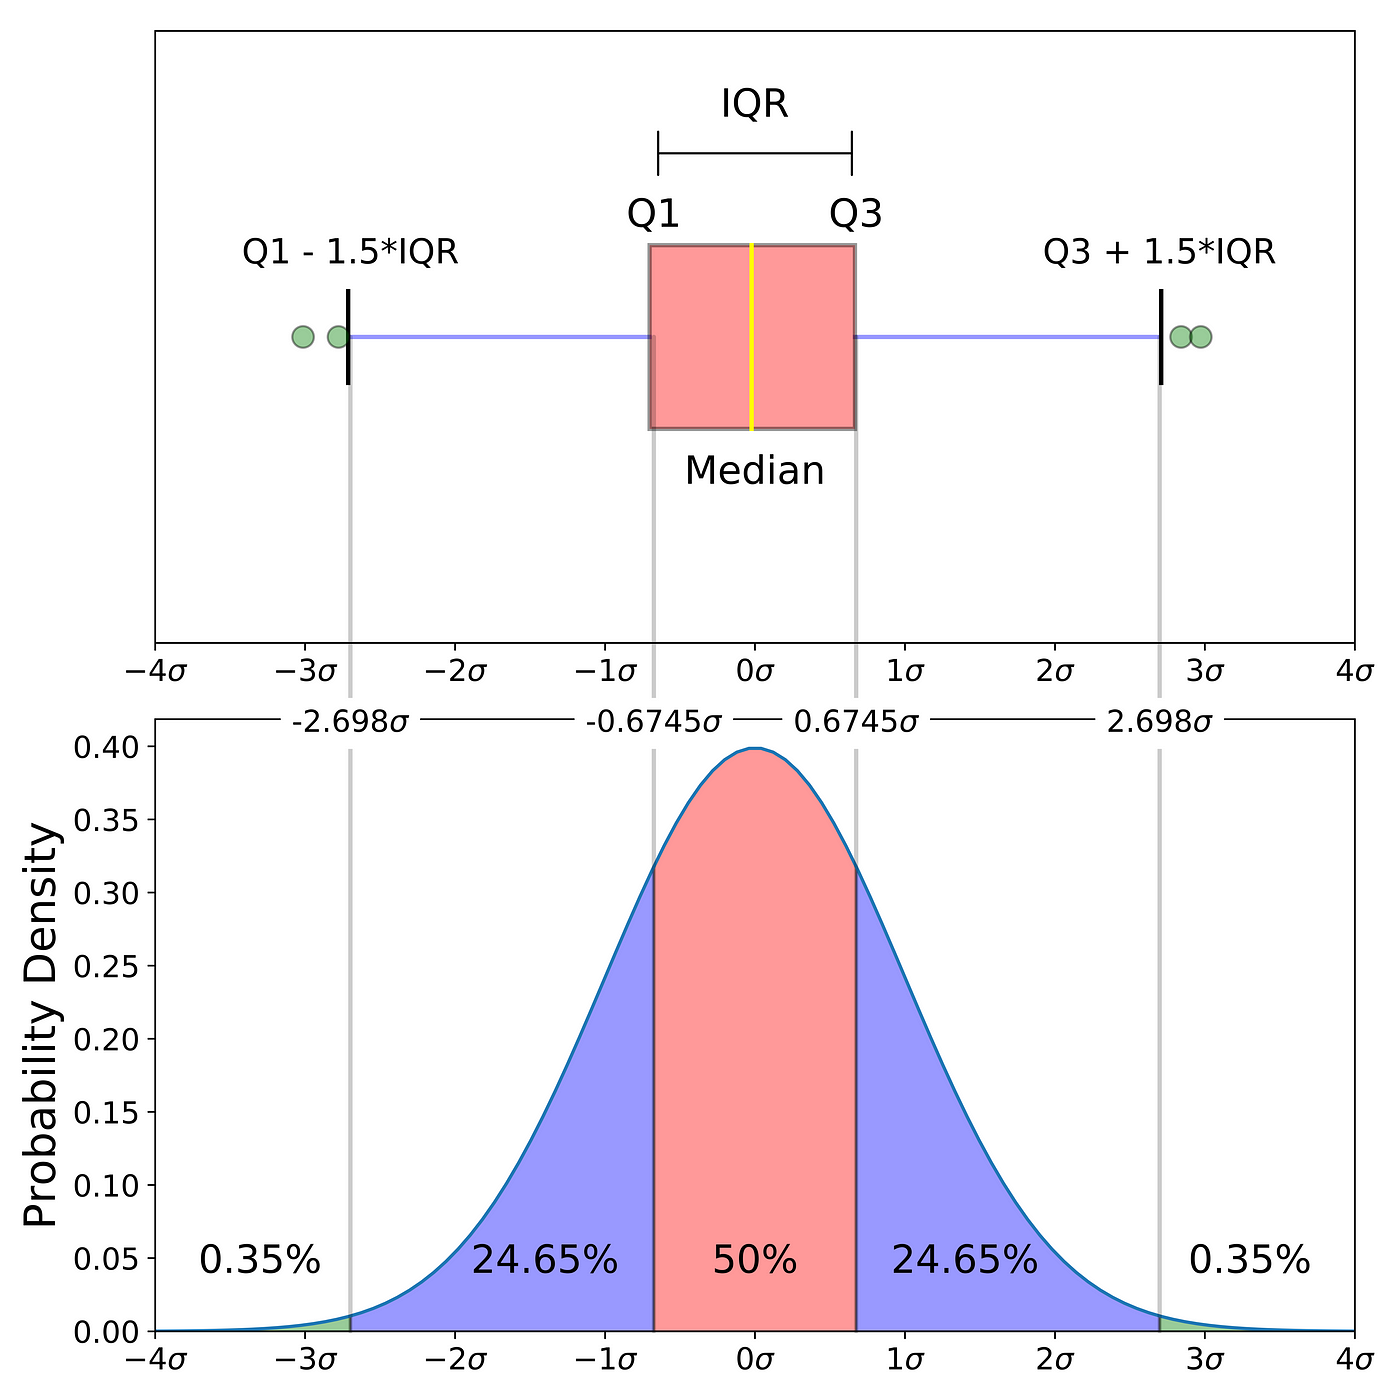

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

## Lets Code and Practice 🚀👨🏼‍💻¶


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Defining Interquartile Range
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr


In [4]:
# less than the lower limit or greater than the upper limit
df[(df["Age"] < low) | (df["Age"] > up)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [5]:
# lets find the index of the outliers
df[(df["Age"] < low) | (df["Age"] > up)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [6]:
# Lets find do I have any outliers ?
df[(df["Age"] > up) | (df["Age"] < low)].any(axis=None)

np.True_

In [7]:
# Lets add functionalty

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Age")
outlier_thresholds(df, "Fare")

(np.float64(-26.724), np.float64(65.6344))

In [8]:
# Lets add check outlier function for further needs (Return Boolean)
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "Age")

True

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [10]:
for col in num_cols:
    print(col, check_outlier(df, col))

PassengerId False
Age True
Fare True


In [11]:
# Lets add function to grab the outliers
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

<Axes: ylabel='Age'>

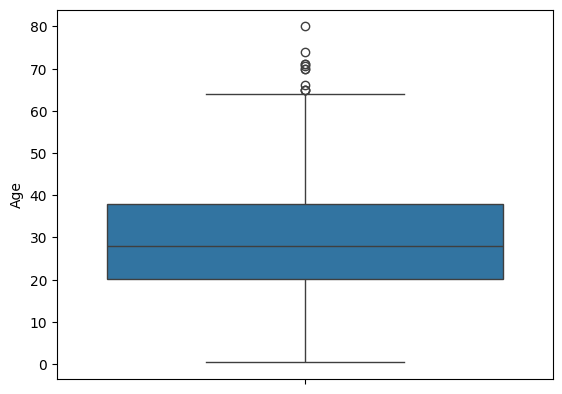

In [12]:
sns.boxplot(df["Age"])


## Solving Outliers Problem

We will check dropping and capping methods in order to solve outlier problems

In [13]:
# Dropping the outlier data points
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

remove_outlier(df, "Fare").shape

(775, 12)

In [14]:
for col in ["Age", "Fare"]:
    new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0]

116

In [15]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

remove_outlier(df, "Age").shape
replace_with_thresholds(df, "Age")

<Axes: ylabel='Age'>

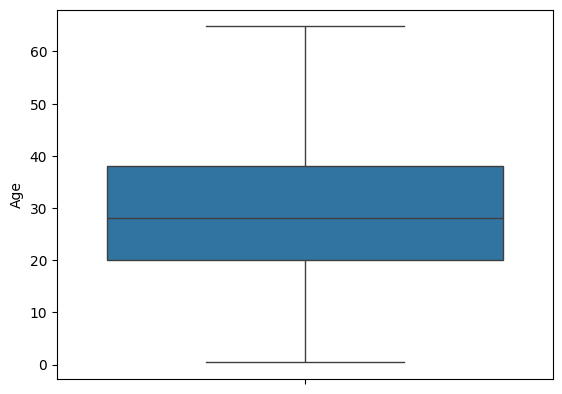

In [16]:
# We can see that all the outlier data points have gone
sns.boxplot(df["Age"])

## Multivariate Outlier Analysis (Local Outlier Factor)



In [18]:
df = pd.read_csv("diamonds.csv")
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
for col in df.columns:
    print(col, check_outlier(df, col))

Unnamed: 0 False
carat True
depth True
table True
price True
x True
y True
z True


In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
# The higher LOF score means the more normal
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:5] # selecting the worst 5 five scores

array([-2.70008125, -2.52709823, -2.3950842 , -2.05416878, -1.93258105])

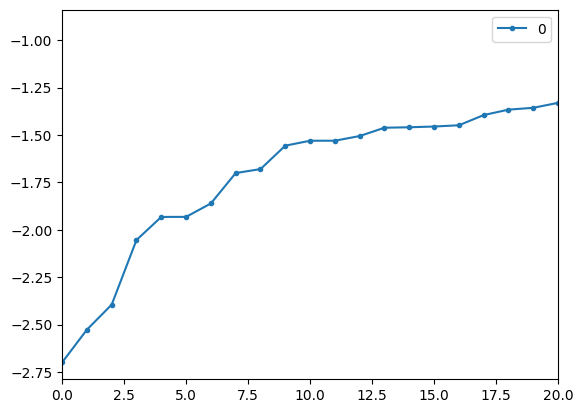

In [23]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [24]:
th = np.sort(df_scores)[3]
df[df_scores < th]
df[df_scores < th].shape
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T
df[df_scores < th].index

Index([24067, 48410, 49189], dtype='int64')

In [25]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)


,Unnamed: 0,carat,depth,table,price,x,y,z


## 2.Missing Values¶
The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.

The other option is to remove data. When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.

💎 Direct removal of missing value observations from the data set and not examining the randomness will lose the statistical reliability of inferences and modelling studies (Alpar, 2011).

### Lets Code and Practice 🚀👨🏼‍💻¶


In [27]:
V1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
V2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
V3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IT", "IT", "IT"])

dff = pd.DataFrame(
    {"salary": V1,
     "V2": V2,
     "V3": V3,
     "departmant": V4}
)

In [28]:
# Lets catch the missing values
dff.isnull().values.any()

np.True_

In [29]:
# Catching the missing value counts for each columns
dff.isnull().sum()

salary        2
V2            3
V3            2
departmant    0
dtype: int64

In [30]:
# Catching the not null data counts for each columns
dff.notnull().sum()

salary        7
V2            6
V3            7
departmant    9
dtype: int64

In [31]:
# Catching total missing value counts for all the dataset
dff.isnull().sum().sum()

np.int64(7)

In [32]:
# Catching the columns that have at least 1 misssing value 
dff[dff.isnull().any(axis=1)]

,salary,V2,V3,departmant
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
3,NaN,8.0,6.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IT


In [33]:
# Lets add functionality

def missing_values_table(dataframe, na_name=False):
    # The columns name that contains missing value
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    # Number of missing data
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    # Ration of the missing data points over the dataset
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    # Missing dataframe
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
missing_values_table(dff, True)

        n_miss  ratio
V2           3  33.33
salary       2  22.22
V3           2  22.22


['salary', 'V2', 'V3']

### We have defined the missing data points, so how can we solve the missing data problem ? 🙋¶
There are some approach to achieve this goal as below.

Dropping the missing data points

Assigning mean, median value of the related column of the dataset

Using imputer to fill the missing data points

Value Assignment in Categorical Variable Breakdown

Using predictive methods to fill missing data points

In [34]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [35]:
# Dropping the missing data points
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [36]:
# Assigning mean, median value of the related column of the dataset
df["Age"].fillna(0)
df["Age"].fillna(df["Age"].mean())
df["Age"].fillna(df["Age"].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [37]:
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Name             0
Pclass           0
Sex              0
Age              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [38]:
dff["Embarked"].fillna(dff["Embarked"].mode()[0])
dff["Embarked"].fillna(dff["Embarked"].mode()[0]).isnull().sum()
dff["Embarked"].fillna("missing")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [39]:
dff.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

dff.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [44]:
# Using imputer to fill the missing data points
# from sklearn.impute import SimpleImputer

# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')  # mean, median, most_frequent, constant
# imp_mean.fit(df)
# imp_mean.transform(df)

In [45]:
# Value Assignment in Categorical Variable Breakdown
# Using predictive methods to fill missing data points
df = pd.read_csv("DSB_Day1_Titanic_train.csv")
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

np.int64(0)

In [46]:
# Using predictive methods to fill missing data points
df = pd.read_csv("DSB_Day1_Titanic_train.csv")
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,True,False,True
1,1,1,1,0,38.0,71.2833,False,False,False
2,1,3,0,0,26.0,7.9250,False,False,True
3,1,1,1,0,35.0,53.1000,False,False,True
4,0,3,0,0,35.0,8.0500,True,False,True


In [48]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [49]:
# Scaling the dataset
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [50]:
# Lets use KNN imputer for predictive filling the missing data points

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [51]:
# Lets use inverse transform to reach the raw dataset
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
df["age_imputed_knn"] = dff[["Age"]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [52]:
# Lets check the null age values with computed age_imputed_knn
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]

,Age,age_imputed_knn
5,NaN,47.8
17,NaN,37.6
19,NaN,12.2
26,NaN,32.8
28,NaN,17.6
...,...,...
859,NaN,25.8
863,NaN,8.8
868,NaN,25.0
878,NaN,27.8


### Advanced Analysis for Missing Data Points¶

💎 We will use missingo library for plotting and interpreting the figure.

💎 And, we will check the missing value correlations and the missing values relation between each other

In [55]:
import missingno as msno

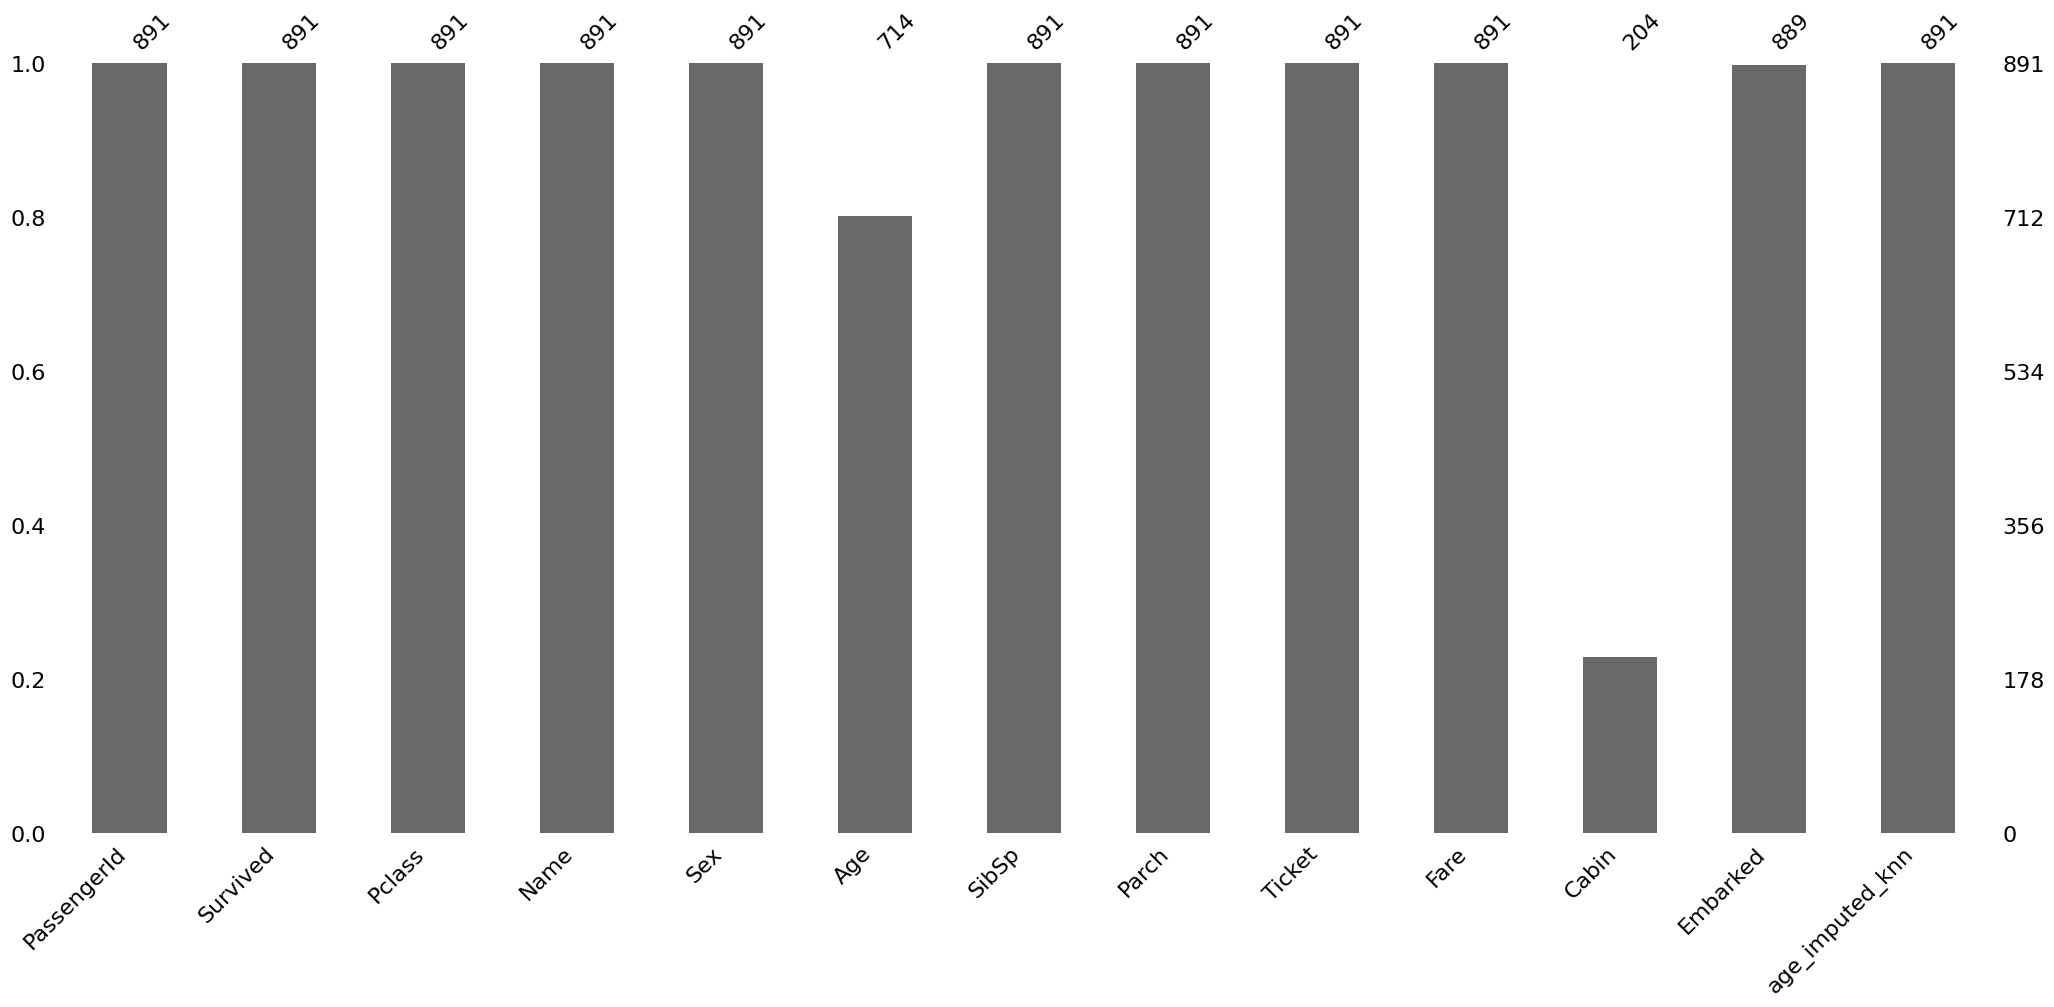

In [56]:
msno.bar(df)
plt.show()

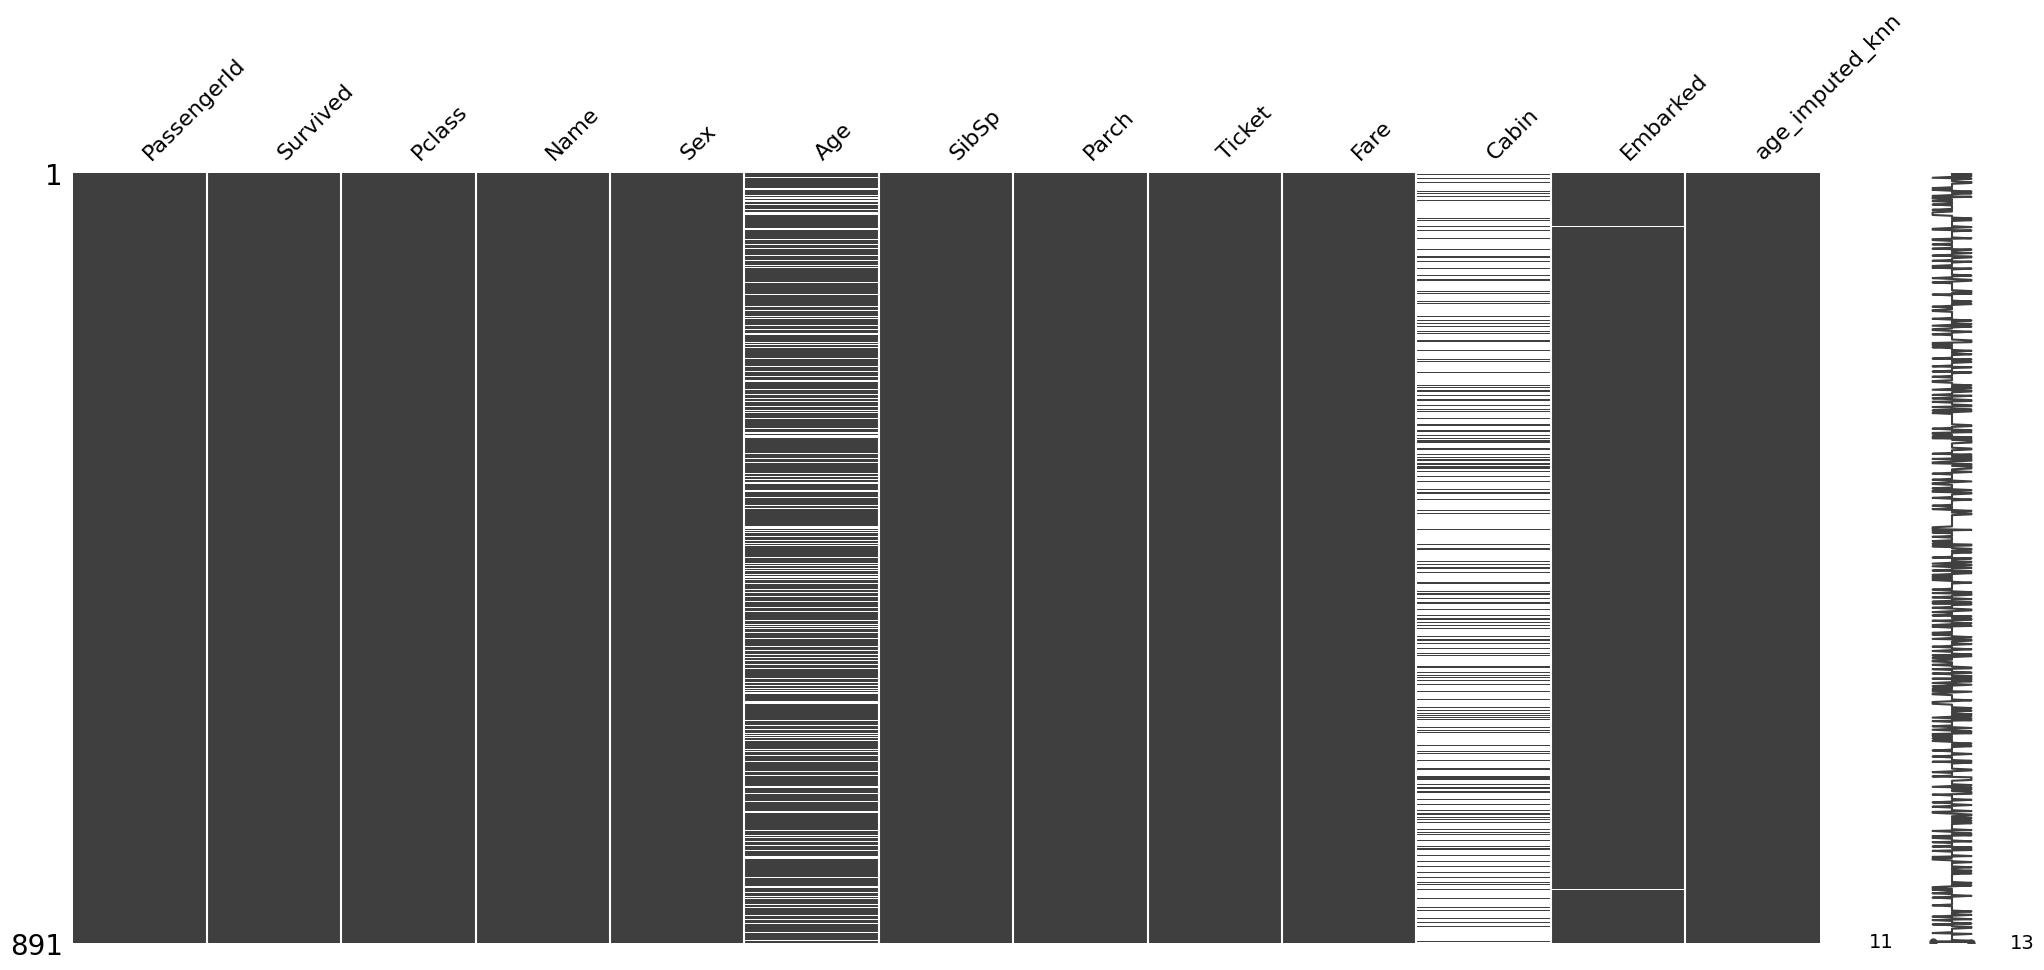

In [57]:
msno.matrix(df)
plt.show()

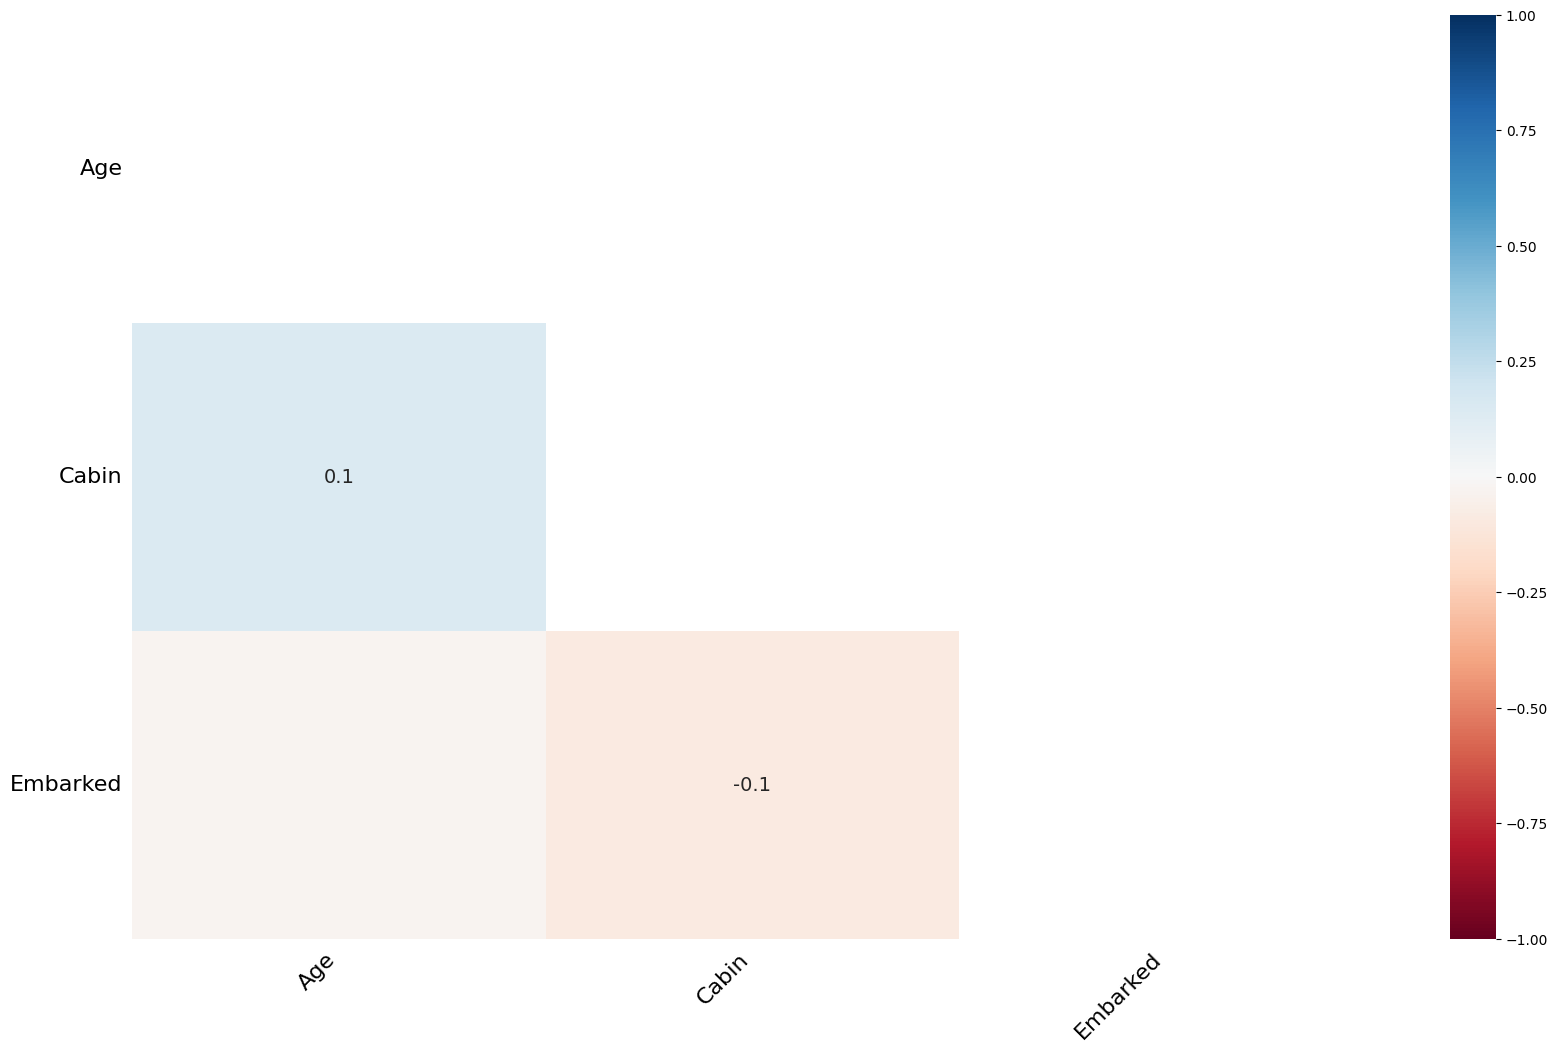

In [58]:
msno.heatmap(df)
plt.show()

In [59]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




## 3. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)¶

Label Encoding & Binary Encoding

Encoding or continuization is the transformation of categorical variables to binary or numerical counterparts. An example is to treat male or female for gender as 1 or 0. Categorical variables must be encoded in many modeling methods (e.g., linear regression, SVM, neural networks)

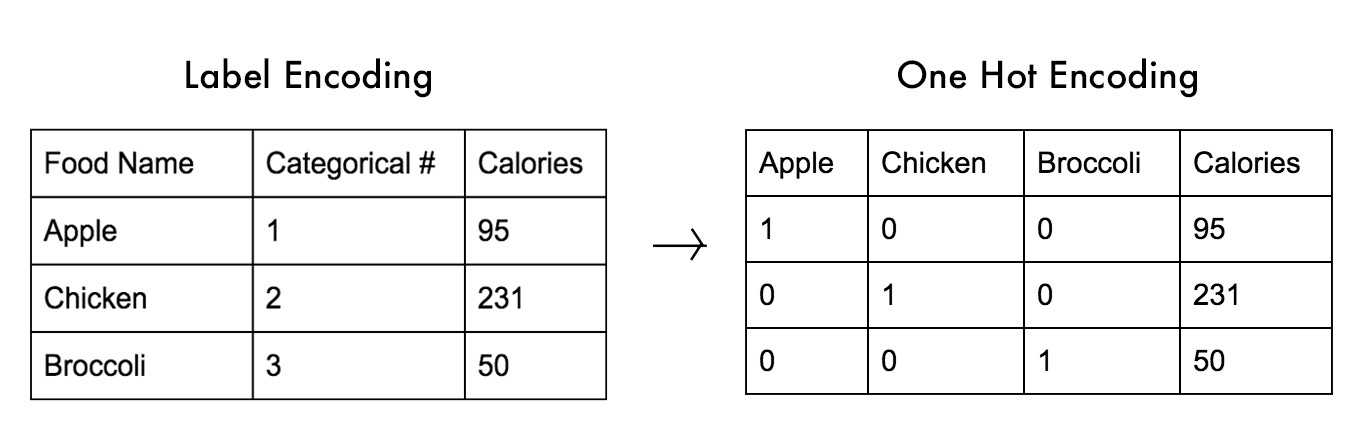

In [60]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")

df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [61]:
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [62]:
# Lets add fuctionality

df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

# First defining the binary columns using categorical columns
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [64]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)
    
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


## One-Hot Encoding¶
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

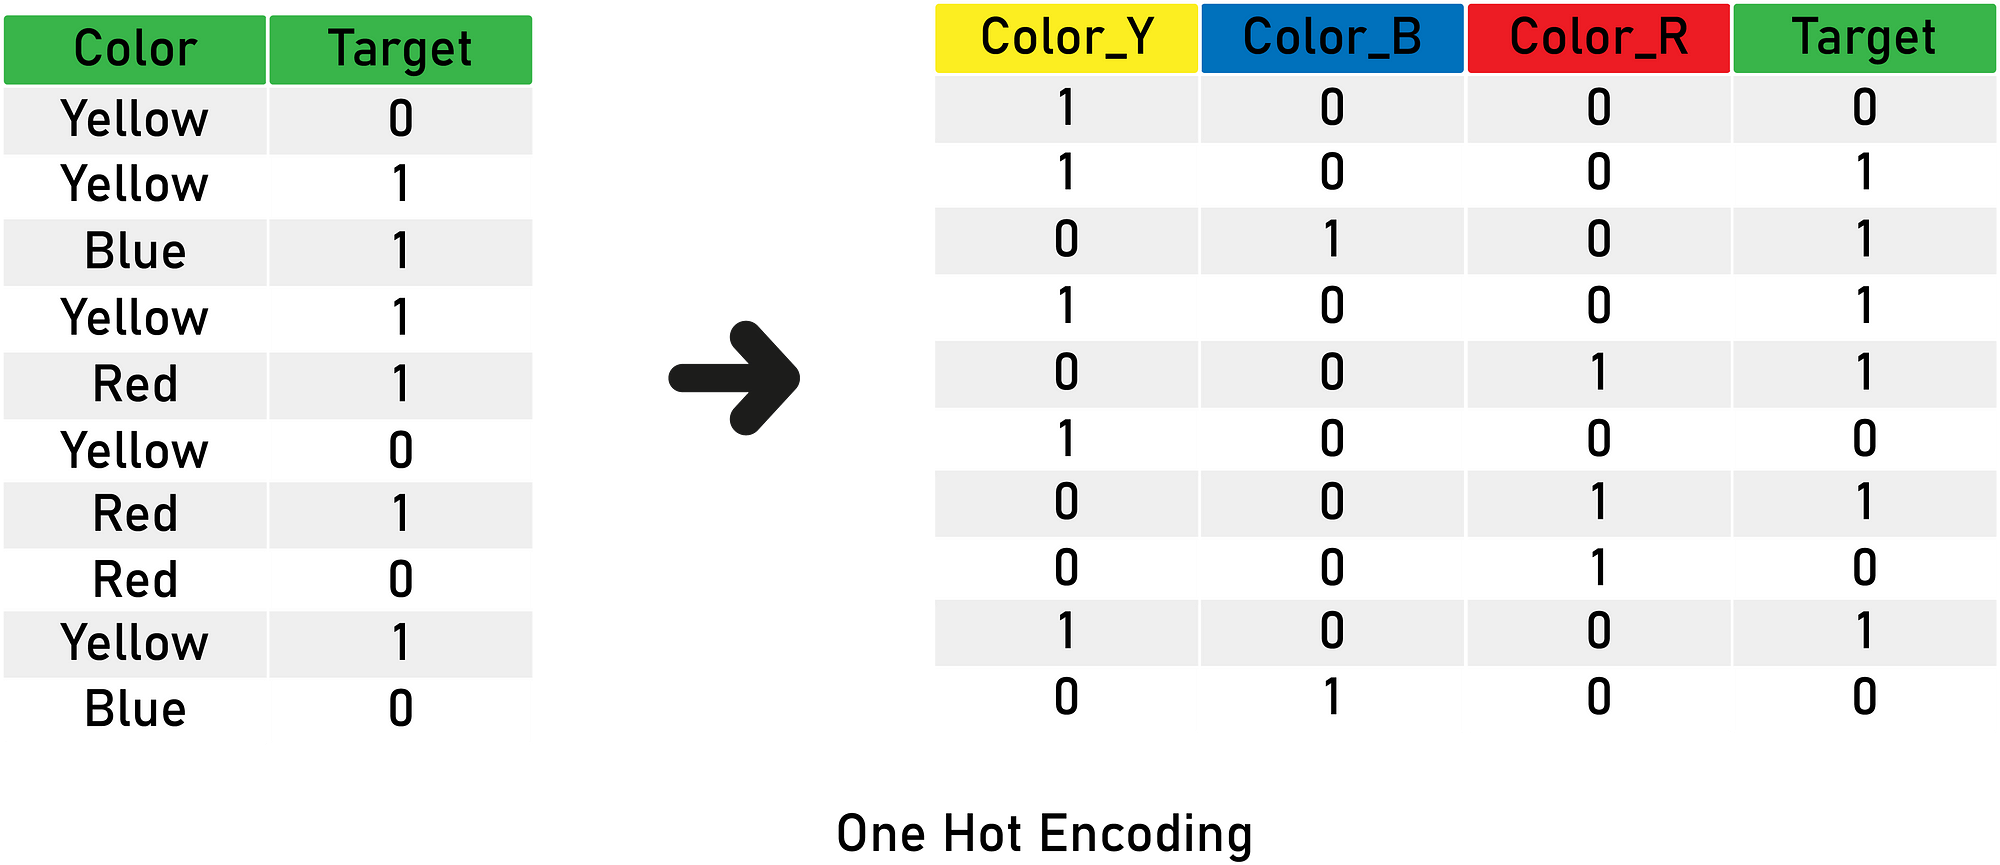

Advantages of one-hot encoding

- Does not assume the distribution of categories of the categorical variable.
- Keeps all the information of the categorical variable.
- Suitable for linear models.

Limitations of one-hot encoding

- Expands the feature space.
- Does not add extra information while encoding.
- Many dummy variables may be identical, and this can introduce redundant information.

Source:
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [65]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,True,False,...,True,False,False,False,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,True,False,...,True,False,False,False,False,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,False,False,...,True,False,False,False,False,False,False,False,False,True


## Rare Encoding¶
Rare labels are those that appear only in a tiny proportion of the observations in a dataset. Rare labels may cause some issues, especially with overfitting and generalization. The solution to that problem is to group those rare labels into a new category like other or rare—this way, the possible issues can be prevented.

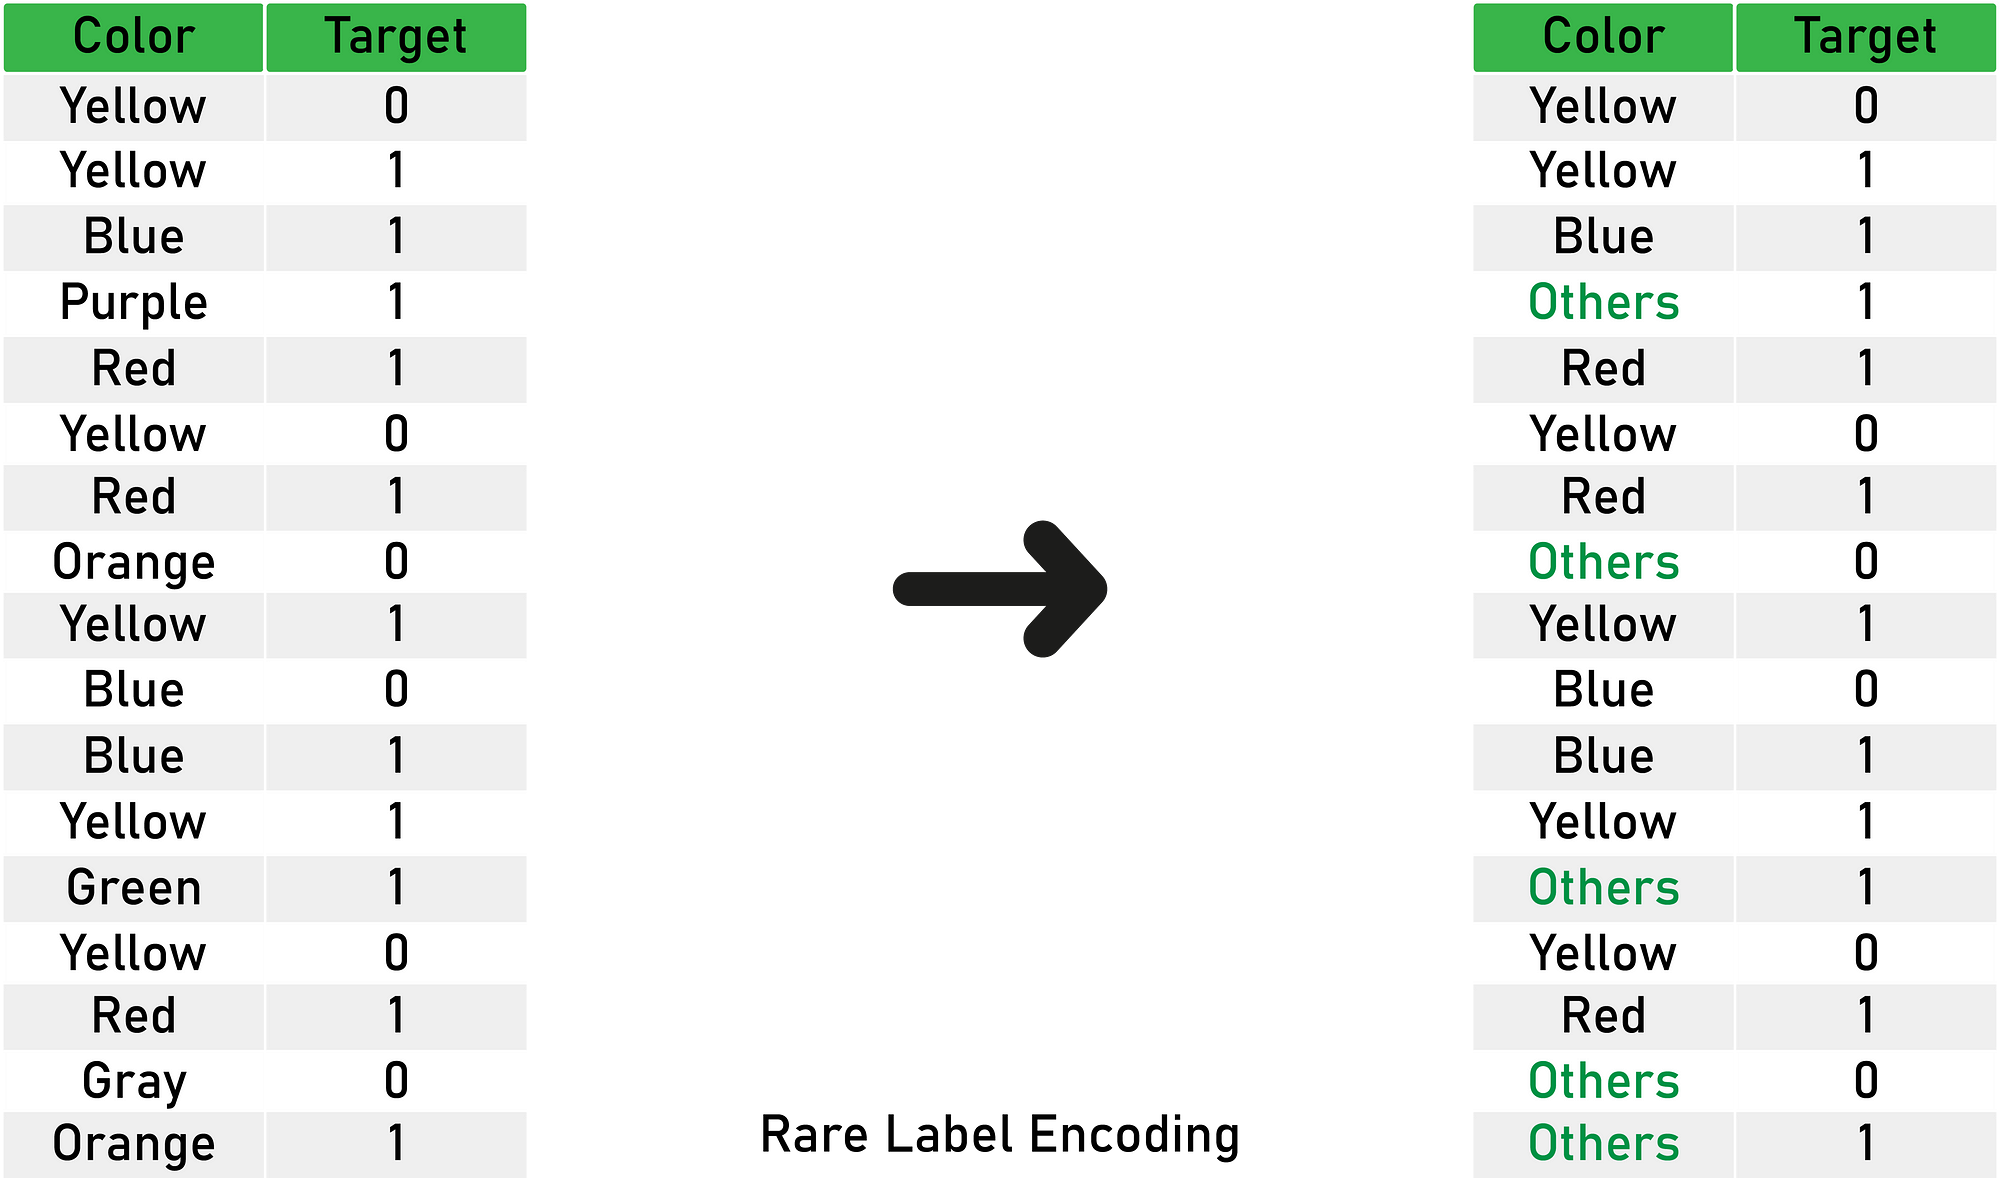


This way, categories that are new in the test set are treated as rare, and the model can know how to handle those categories as well, even though they weren’t present in the train set.

Source:
https://heartbeat.comet.ml/hands-on-with-feature-engineering-techniques-encoding-categorical-variables-be4bc0715394

In [67]:
# 1. Target Frequency
# 2. Traget Ratio
# 3. Group by columns for target column

# Lets use large dataset to understand better the rare encoding
df = pd.read_csv("application_train.csv")

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [68]:
df.TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [69]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

new_df = rare_encoder(df, 0.01)

In [70]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
# With the ouput, we can analyze the rare columns
rare_analyser(new_df, "TARGET", cat_cols)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39
NAME_CONTRACT_TYPE : 2
                     COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                               
Cash loans          278232  0.904787     0.083459
Revolving loans      29279  0.095213     0.054783


CODE_GENDER : 3
              COUNT     RATIO  TARGET_MEAN
CODE_GENDER                               
F            202448  0.658344     0.069993
M            105059  0.341643     0.101419
Rare              4  0.000013     0.000000


FLAG_OWN_CAR : 2
               COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                               
N             202924  0.659892     0.085002
Y             104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
                  COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                               
N                 94199  0.306327     0.083249
Y                213312  0.693673     0.079616


NAME_TYPE_SUITE : 5
                  COUNT 

In [71]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                               
Cash loans          278232  0.904787     0.083459
Revolving loans      29279  0.095213     0.054783


CODE_GENDER : 3
              COUNT     RATIO  TARGET_MEAN
CODE_GENDER                               
F            202448  0.658344     0.069993
M            105059  0.341643     0.101419
XNA               4  0.000013     0.000000


FLAG_OWN_CAR : 2
               COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                               
N             202924  0.659892     0.085002
Y             104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
                  COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                               
N                 94199  0.306327     0.083249
Y                213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
NAME_TYPE_SUITE                               
Children           3267

## 4. Feature Scaling¶
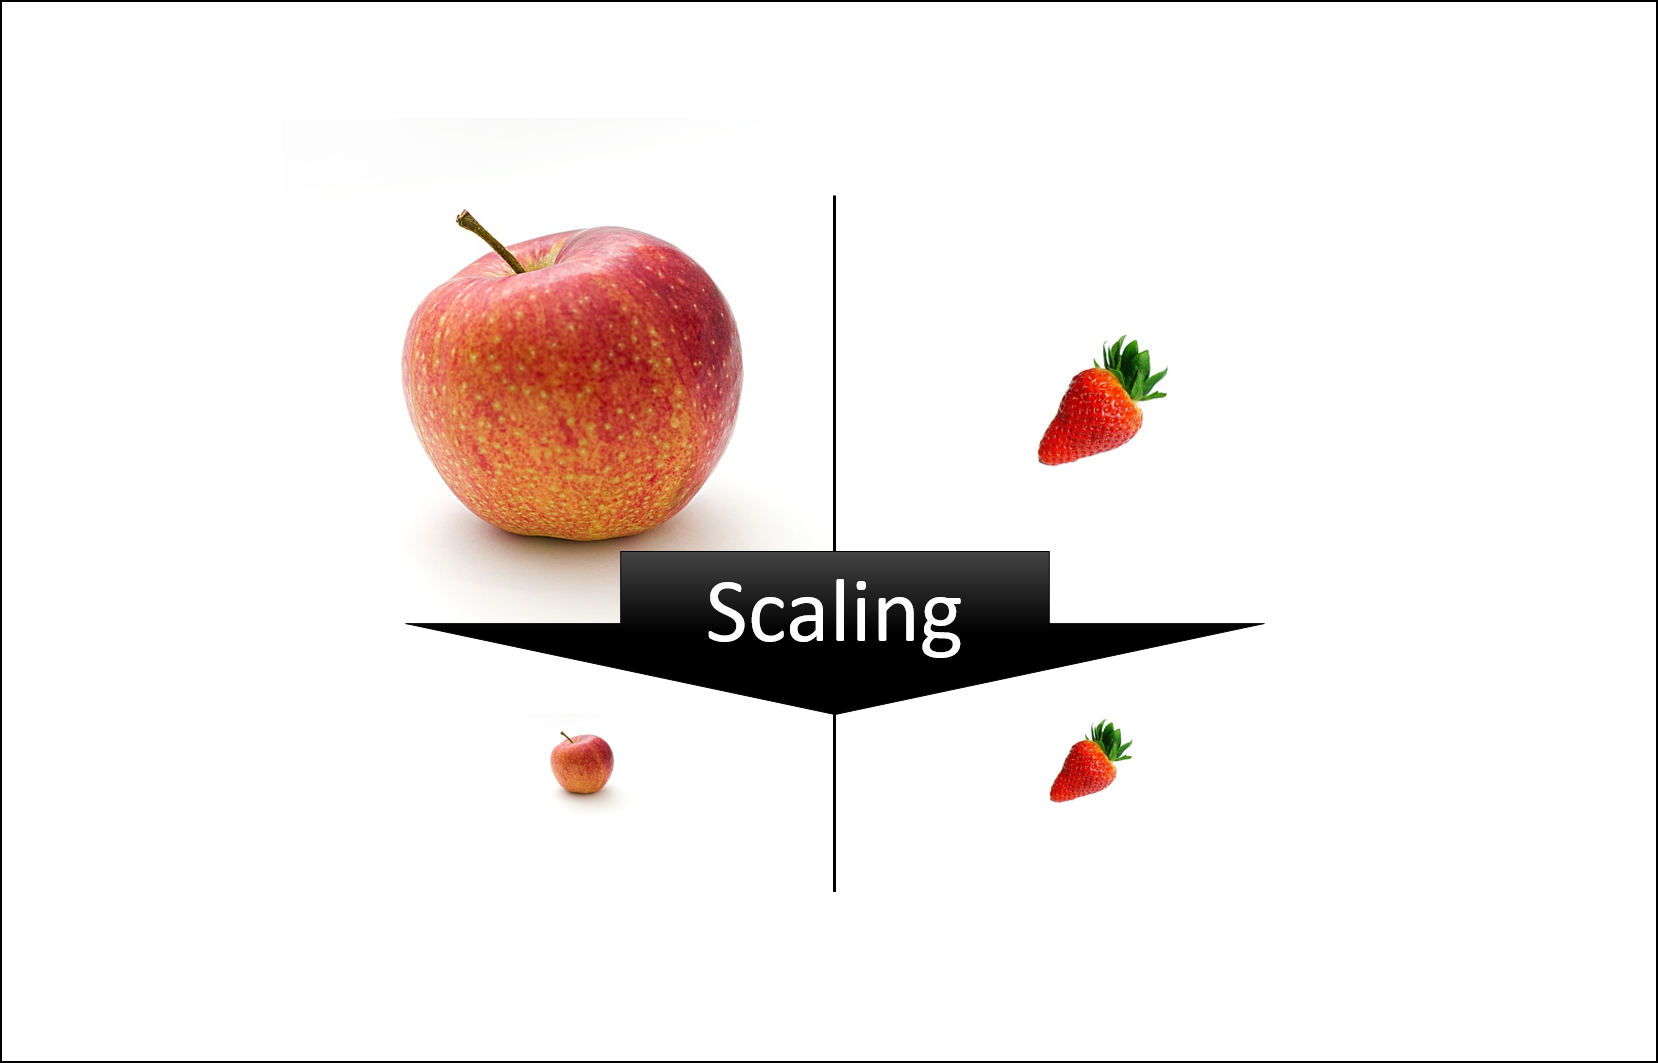

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.

### Type of feature scaling:

StandardScaler: z = (x - u) / s

RobustScaler: value = (value – median) / (p75 – p25)

MinMaxScaler:

  X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
  
  X_scaled = X_std * (max - min) + min

Logaritmic Scaler: Taking the log of the value. But, if we have a negative values we couldn't take the log. So we need to be careful abaout it.

Source:
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [72]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")

scaler = StandardScaler()

df["Age_standard_scaler"] = scaler.fit_transform(df[["Age"]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


In [73]:
rscaler = RobustScaler()

df["Age_robuts_scaler"] = rscaler.fit_transform(df[["Age"]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608


In [74]:
mmscaler = MinMaxScaler()

df["Age_min_max_scaler"] = mmscaler.fit_transform(df[["Age"]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531


In [75]:
df["Age_log"] = np.log(df["Age"])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler,Age_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,3.555348


## 5. Feature Extraction¶
Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing. A characteristic of these large data sets is a large number of variables that require a lot of computing resources to process.

https://deepai.org/machine-learning-glossary-and-terms/feature-extraction#:~:text=Feature%20extraction%20is%20a%20process,of%20computing%20resources%20to%20process.

In [76]:
# If the cabin is Nan we will assign as 0 otherwise 1
# We know that employees att Titanic dont have Cabin

df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')

# So let's analyze them if they survive or not

df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.299854
1,0.666667


In [77]:
# Lets check the used method for Cabin column using proportion test

from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# Ho rejected. That means, there is no difference between the cabin breakdown for Survived target as statistically

Test Stat = 9.4597, p-value = 0.0000


In [78]:
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic

# Lets check the relation as alone or not using feature extraction

df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler,Age_log,NEW_CABIN_BOOL,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,3.091042,0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,3.637586,1,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,3.258097,0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,3.555348,1,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,3.555348,0,YES


In [79]:
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})


,Survived
NEW_IS_ALONE,
NO,0.505650
YES,0.303538


In [80]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# Ho rejected. That means, there is no difference between the cabin breakdown for Survived target as statistically

Test Stat = -6.0704, p-value = 0.0000


In [81]:
# Lets check the title of the titanic crew and analyze

df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
df.groupby("NEW_NAME_DR").agg({"Survived": "mean"})

,Survived
NEW_NAME_DR,
0,0.38252
1,0.50000


In [82]:
# Lets use the same method for all title using regex
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_1601/1093817489.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


Survived   Age           
               mean count       mean
NEW_TITLE                           
Capt       0.000000     1  70.000000
Col        0.500000     2  58.000000
Countess   1.000000     1  33.000000
Don        0.000000     1  40.000000
Dr         0.428571     6  42.000000
Jonkheer   0.000000     1  38.000000
Lady       1.000000     1  48.000000
Major      0.500000     2  48.500000
Master     0.575000    36   4.574167
Miss       0.697802   146  21.773973
Mlle       1.000000     2  24.000000
Mme        1.000000     1  24.000000
Mr         0.156673   398  32.368090
Mrs        0.792000   108  35.898148
Ms         1.000000     1  28.000000
Rev        0.000000     6  43.166667
Sir        1.000000     1  49.000000

## 6. Feature Interactions¶
If a machine learning model makes a prediction based on two features, we can decompose the prediction into four terms: a constant term, a term for the first feature, a term for the second feature and a term for the interaction between the two features. The interaction between two features is the change in the prediction that occurs by varying the features after considering the individual feature effects.

In [83]:
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df["NEW_AGExPCLASS"] = df["Age"] * df["Pclass"]

In [84]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_robuts_scaler,Age_min_max_scaler,Age_log,NEW_CABIN_BOOL,NEW_IS_ALONE,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_SEX_CAT,NEW_AGExPCLASS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,-0.335664,0.271174,3.091042,0,NO,0,Mr,2,maturemale,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.559441,0.472229,3.637586,1,NO,0,Mrs,2,maturefemale,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.111888,0.321438,3.258097,0,YES,0,Miss,1,maturefemale,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.391608,0.434531,3.555348,1,NO,0,Mrs,2,maturefemale,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.391608,0.434531,3.555348,0,YES,0,Mr,1,maturemale,105.0


## 7. End-to-End Application¶
We will use Titanic dataset and we will use all the feature engineering methods. After all this process, we will use Random Forest Classifier to predict Survive or not.

In [85]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")


In [86]:
# Feature Engineering


# Cabin bool
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')
# Name count
df["NEW_NAME_COUNT"] = df["Name"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]
# is alone
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['Age'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['Age'] >= 18) & (df['Age'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['Age'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.head()

<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\.'
/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_1601/3794901364.py:13: SyntaxWarning: invalid escape sequence '\.'
  df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


In [87]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

df.shape

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


(891, 22)

In [88]:
#############################################
# 2. Outliers (Aykırı Değerler)
#############################################


for col in num_cols:
    print(col, check_outlier(df, col))


for col in num_cols:
    replace_with_thresholds(df, col)


for col in num_cols:
    print(col, check_outlier(df, col))

PassengerId False
Age True
Fare True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True
PassengerId False
Age False
Fare False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [89]:
# 3. Missing Values (Eksik Değerler)
#############################################

missing_values_table(df)
df.head()


df.drop("Cabin", inplace=True, axis=1)
missing_values_table(df)



remove_cols = ["Ticket", "Name"]
df.drop(remove_cols, inplace=True, axis=1)
df.head()

missing_values_table(df)


                n_miss  ratio
Cabin              687  77.10
Age                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
Embarked             2   0.22
                n_miss  ratio
Age                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
Embarked             2   0.22
                n_miss  ratio
Age                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
Embarked             2   0.22


In [90]:
df["Age"] = df["Age"].fillna(df.groupby("NEW_TITLE")["Age"].transform("median"))
missing_values_table(df)

df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]

df.loc[(df['Age'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['Age'] >= 18) & (df['Age'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['Age'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == 'male') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'

missing_values_table(df)

df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
missing_values_table(df)


                n_miss  ratio
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
Embarked             2   0.22
          n_miss  ratio
Embarked       2   0.22
Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [91]:
# Label Encoding

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [92]:
# Rare Encoding

rare_analyser(df, "Survived", cat_cols)

df = rare_encoder(df, 0.01)
df["NEW_TITLE"].value_counts()
rare_analyser(df, "Survived", cat_cols)

Sex : 2
     COUNT     RATIO  TARGET_MEAN
Sex                              
0      314  0.352413     0.742038
1      577  0.647587     0.188908


Embarked : 3
          COUNT     RATIO  TARGET_MEAN
Embarked                              
C           168  0.188552     0.553571
Q            77  0.086420     0.389610
S           646  0.725028     0.339009


NEW_TITLE : 17
           COUNT     RATIO  TARGET_MEAN
NEW_TITLE                              
Capt           1  0.001122     0.000000
Col            2  0.002245     0.500000
Countess       1  0.001122     1.000000
Don            1  0.001122     0.000000
Dr             7  0.007856     0.428571
Jonkheer       1  0.001122     0.000000
Lady           1  0.001122     1.000000
Major          2  0.002245     0.500000
Master        40  0.044893     0.575000
Miss         182  0.204265     0.697802
Mlle           2  0.002245     1.000000
Mme            1  0.001122     1.000000
Mr           517  0.580247     0.156673
Mrs          125  0.140292   

In [93]:
#############################################
# One-Hot Encoding
#############################################


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)
df.head()
df.shape

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PassengerId" not in col]


rare_analyser(df, "Survived", cat_cols)
df.head()



(df["Sex"].value_counts() / len(df) < 0.01).any()
(df["NEW_NAME_WORD_COUNT_9"].value_counts() / len(df) < 0.01).any()


useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]


Observations: 891
Variables: 59
cat_cols: 54
num_cols: 5
cat_but_car: 0
num_but_cat: 54
Survived : 2
          COUNT     RATIO  TARGET_MEAN
Survived                              
0           549  0.616162          0.0
1           342  0.383838          1.0


Sex : 2
     COUNT     RATIO  TARGET_MEAN
Sex                              
0      314  0.352413     0.742038
1      577  0.647587     0.188908


NEW_CABIN_BOOL : 2
                COUNT     RATIO  TARGET_MEAN
NEW_CABIN_BOOL                              
0                 687  0.771044     0.299854
1                 204  0.228956     0.666667


NEW_NAME_DR : 2
             COUNT     RATIO  TARGET_MEAN
NEW_NAME_DR                              
0              881  0.988777      0.38252
1               10  0.011223      0.50000


NEW_IS_ALONE : 2
              COUNT     RATIO  TARGET_MEAN
NEW_IS_ALONE                              
0               354  0.397306     0.505650
1               537  0.602694     0.303538


Pclass_1 : 2
    

In [94]:
#############################################
# Standart Scaler
#############################################


num_cols

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

# son kontrol:
df.head()
df.shape
df.tail()

,PassengerId,Survived,Sex,Age,Fare,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale
886,887,0,1,-0.178157,-0.539655,0,-0.680764,0,-0.300762,1,...,False,False,False,True,False,False,False,True,False,False
887,888,1,0,-0.790127,0.290823,1,0.173547,0,-1.371908,1,...,False,False,False,True,False,False,True,False,False,False
888,889,0,0,-0.637135,-0.029155,0,1.638081,0,-0.025324,0,...,False,False,False,True,False,False,True,False,False,False
889,890,1,1,-0.254653,0.290823,1,-0.680764,0,-1.157679,1,...,False,False,False,True,False,False,False,True,False,False
890,891,0,1,0.204324,-0.796127,0,-0.924853,0,0.984614,1,...,False,False,False,True,False,False,False,True,False,False


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [97]:
#############################################
# Model
#############################################


y = df["Survived"]
X = df.drop(["PassengerId", "Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# MODEL
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8022388059701493